# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [2]:
# set Kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='longnvb24'
os.environ['KAGGLE_KEY']='c9132ead91bc177aa4a6c2057cf76cc1'

In [3]:
# download the dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


# Load & Explore Data

In [5]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#count of rows and columns
df.shape

(569, 33)

In [7]:
#count number of null(empty) values
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
# Drop the column with the null values
df.dropna(axis=1, inplace=True)

In [9]:
# count of rows and columns
df.shape

(569, 32)

In [10]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


# Label Encoding

In [11]:
#Get Datatypes of each column in our dataset
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [12]:
#Encode the diganosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [13]:
#display df
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Dataset & Feature Scaling

In [14]:
#Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [15]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [16]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
#print data
X_train

array([[-0.65974535, -0.47468821, -0.68596566, ..., -0.04008615,
        -0.53658453, -0.72178357],
       [-0.72786915, -0.73702303, -0.75419616, ..., -0.71019315,
        -0.09581615,  0.17510317],
       [ 1.01212607,  0.91387713,  1.13570652, ...,  1.31310155,
        -0.96471439,  2.04693704],
       ...,
       [ 1.63659417,  0.51359038,  1.57550553, ...,  1.04759315,
         0.25016333, -0.0983773 ],
       [ 0.42455835,  3.22739886,  0.50683503, ...,  1.34025582,
         0.94844156,  1.93926756],
       [-1.18032467,  0.02510485, -1.12699776, ..., -0.22729975,
        -0.45759378,  0.02813434]])

# Build a Logistic Regression Model

In [18]:
# build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [19]:
#make use of trained model to make predictions on the test data
predictions = classifier.predict(X_test)

# Performance Evaluation

[[87  1]
 [ 2 53]]


<Axes: >

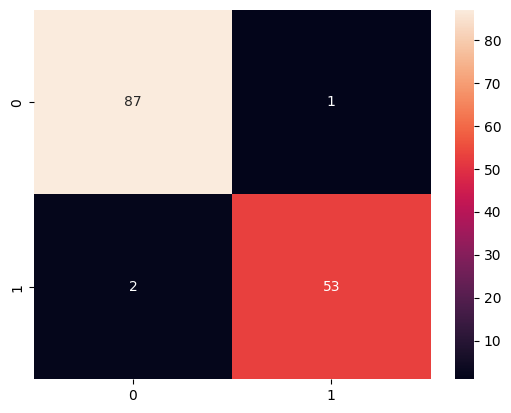

In [20]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')

In [21]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))

0.9790209790209791
